# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
df = pd.read_csv('/content/drive/MyDrive/ybigta/0713/airbnb_listings.csv', index_col=0)

<ipython-input-55-87fe0fa4d36f>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ybigta/0713/airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [56]:
# Q1

pd.set_option('display.max_columns', None)
df.head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,t,Other,Private room,2,NaN,1.0,2.0,Real Bed,"{Internet,Wifi}",NaN,100,NaN,NaN,NaN,1,$0.00,1,730,t,30,60,90,365,1,0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",NaN,225,"$1,995.00",NaN,$350.00,1,$0.00,7,1125,t,4,34,64,339,48,5,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,t,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",500.0,89,$575.00,"$2,100.00",$500.00,1,$0.00,1,730,t,6,10,13,151,313,69,90.0,9.0,9.0,10.0,10.0,10.0,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,f,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,200,NaN,NaN,$300.00,2,$100.00,3,21,t,0,0,0,0,78,8,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,t,Apartment,Private room,2,NaN,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,E...",NaN,94,NaN,NaN,NaN,1,$13.00,1,730,t,30,60,90,109,75,0,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [57]:
# Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_response_time                31790 non-null  object 
 2   host_response_rate                31790 non-null  object 
 3   host_acceptance_rate              36781 non-null  object 
 4   host_is_superhost                 50791 non-null  object 
 5   host_listings_count               50791 non-null  float64
 6   host_total_listings_count         50791 non-null  float64
 7   host_verifications                50796 non-null  object 
 8   host_has_profile_pic              50791 non-null  object 
 9   host_identity_verified            50791 non-null  object 
 10  neighborhood                      50796 non-null  object 
 11  latitude                          50796 non-null  float64
 12  long

In [63]:
#Q2
missing_num =df.isna().sum()
missing_percent =(df.isna().sum() / len(df)) * 100

newdf = pd.DataFrame({'missing_num': missing_num, 'missing_%': missing_percent})
newdf['missing_%'] = newdf['missing_%'].round(1)
newdf = newdf.sort_values(by='missing_%', ascending=False)
newdf = newdf[newdf['missing_num'] > 0]

newdf

,missing_num,missing_%
jurisdiction_names,50781,100.0
license,50759,99.9
square_feet,50407,99.2
monthly_price,46119,90.8
weekly_price,45411,89.4
host_response_rate,19006,37.4
host_response_time,19006,37.4
security_deposit,17325,34.1
host_acceptance_rate,14015,27.6
review_scores_accuracy,11466,22.6


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

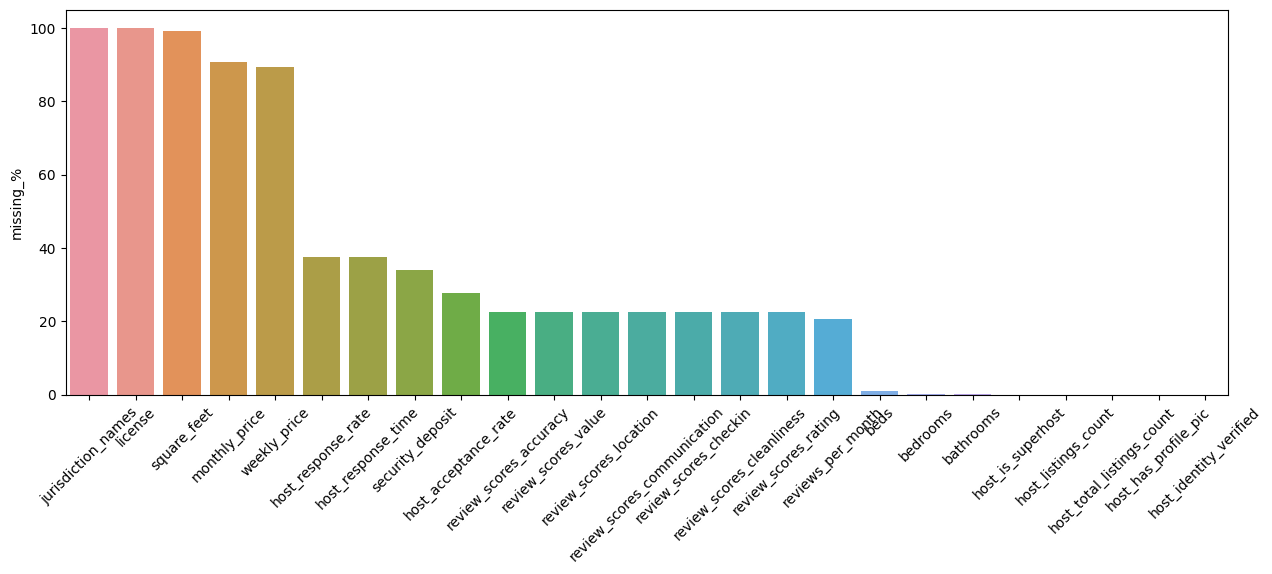

In [65]:
# Q3
plt.figure(figsize=(15,5))
missing = newdf['missing_%']
sns.barplot(x=newdf.index, y= 'missing_%', data=newdf)
plt.ylabel('missing_%')
plt.xticks(rotation=45)

plt.show()


- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [66]:
# Q4

df[df['beds'].isnull()].head(5)

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,Manhattan,40.70850,-74.01795,t,Apartment,Private room,2,NaN,1.0,NaN,Real Bed,{},NaN,150,$500.00,"$1,600.00",NaN,1,$0.00,1,1125,t,30,60,90,365,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Manhattan,40.72152,-73.99279,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,1300,NaN,NaN,NaN,1,$0.00,1,1125,t,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,Brooklyn,40.70528,-73.95756,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,190,NaN,NaN,$0.00,1,$100.00,1,218,t,30,60,90,365,1,0,NaN,10.0,8.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.77799,-73.95223,t,Apartment,Private room,1,NaN,1.0,NaN,Real Bed,{},NaN,80,$700.00,"$3,000.00",NaN,1,$0.00,1,60,t,0,0,0,0,1,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Brooklyn,40.71099,-73.95217,t,Apartment,Private room,1,1.0,1.0,NaN,Real Bed,{},NaN,48,NaN,NaN,NaN,1,$0.00,5,30,t,0,0,0,0,1,0,80.0,6.0,6.0,10.0,10.0,10.0,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [67]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [68]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50796 entries, 0 to 50795
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                50796 non-null  int64  
 1   host_is_superhost                 50791 non-null  object 
 2   host_listings_count               50791 non-null  float64
 3   host_total_listings_count         50791 non-null  float64
 4   host_verifications                50796 non-null  object 
 5   host_has_profile_pic              50791 non-null  object 
 6   host_identity_verified            50791 non-null  object 
 7   neighborhood                      50796 non-null  object 
 8   latitude                          50796 non-null  float64
 9   longitude                         50796 non-null  float64
 10  is_location_exact                 50796 non-null  object 
 11  property_type                     50796 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

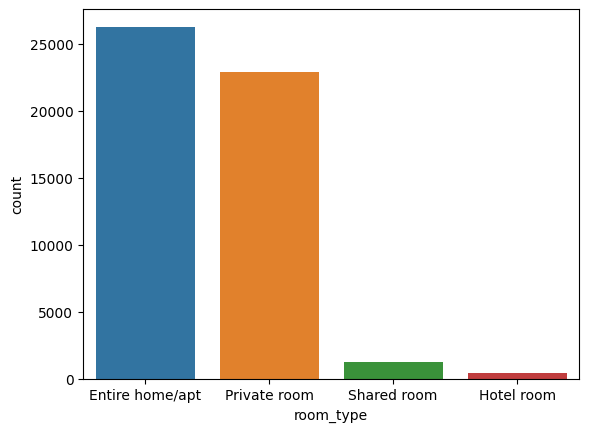

In [70]:
# Q5
count = df["room_type"].value_counts()
sns.barplot(x=count.index, y= count.values, data=df)
plt.xlabel('room_type')
plt.ylabel('count')

plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

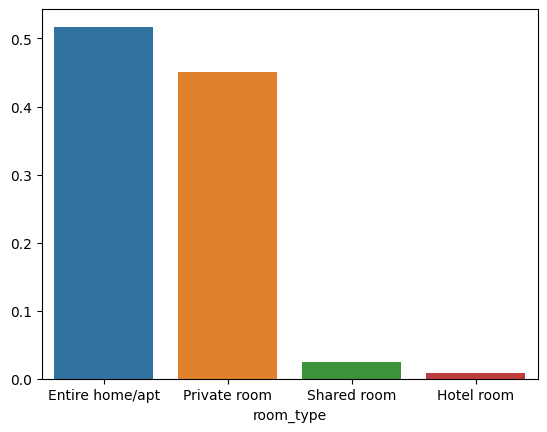

In [71]:
# Q6
count = df["room_type"].value_counts() / len(df['room_type'])
sns.barplot(x=count.index, y= count.values, data=df)
plt.xlabel('room_type')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

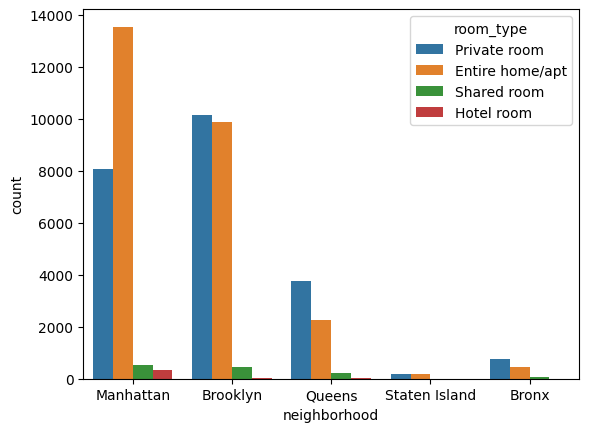

In [72]:
# Q7
sns.countplot(x='neighborhood', data= df, hue = 'room_type')
plt.ylabel('count')
plt.show()

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

<ipython-input-73-6bed76080014>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'neighborhood', y = 'price', data = df, palette= 'Set1')


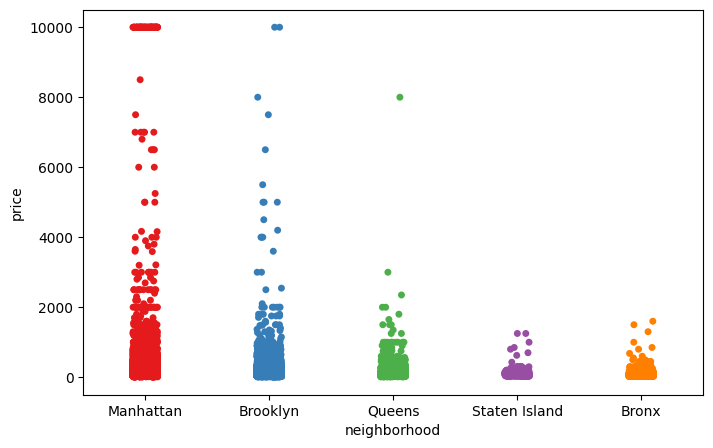

In [73]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요

plt.figure(figsize = (8, 5))
sns.stripplot(x = 'neighborhood', y = 'price', data = df, palette= 'Set1')
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?


높은 가격대가 많이 분포하는 맨해튼 같은 도시는 Entire home/apt의 수요가 private room 보다 높았기 때문에, 비싼 객실에 소비를 하는(소득이 큰) 고객들이 비교적 많다는 가설을 새울 수 있다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

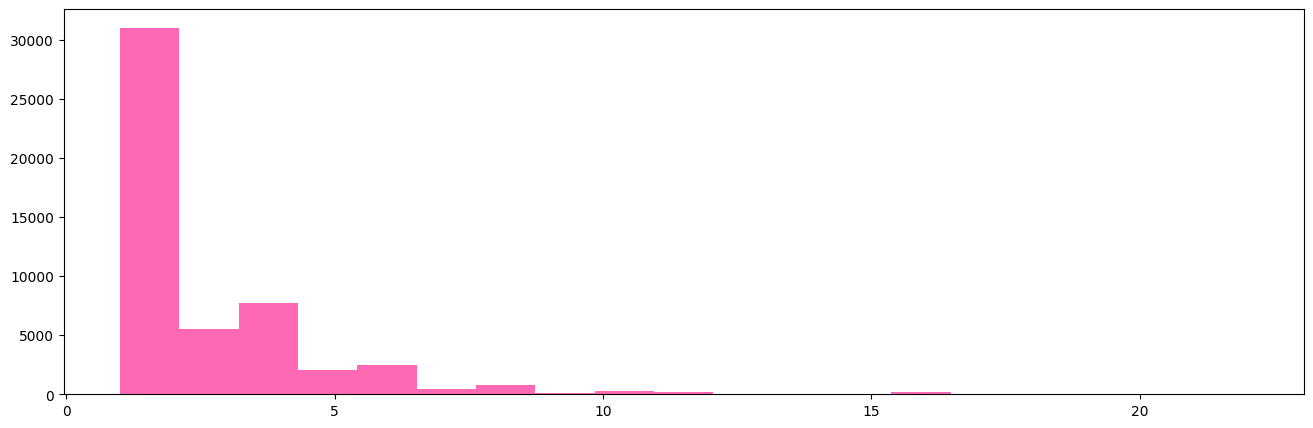

In [74]:
# Q10

plt.figure(figsize=(16, 5))
plt.hist(df['accommodates'], bins=len(df['accommodates'].value_counts()), color = 'hotpink')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

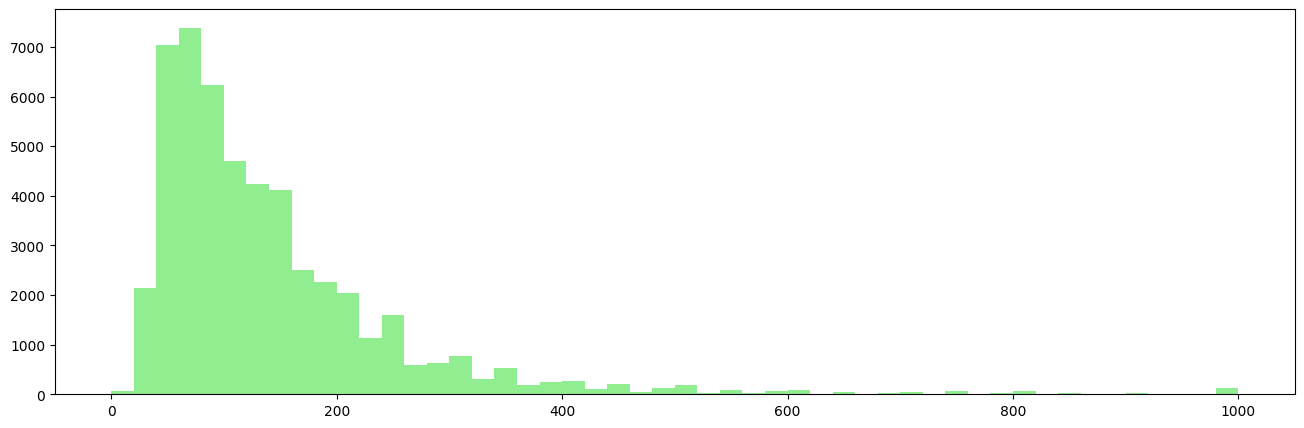

In [75]:
# Q11

plt.figure(figsize=(16, 5))
plt.hist(x = 'price', data = df, bins=50, range=(0, 1000), color = 'lightgreen')
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>


---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ybigta/0713/airbnb_listings.csv', index_col=0)

<ipython-input-4-87fe0fa4d36f>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ybigta/0713/airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [5]:
#Q12
missing_percent = df.isnull().sum() / len(df)

for col in df.columns:
    if missing_percent[col] >= 0.25:
        df = df.drop(col, axis=1)
    elif missing_percent[col] >= 0.1:
        df = df.dropna(subset=[col])
    else:
        if df[col].dtype != object:
            median = df[col].median()
            df[col] = df[col].fillna(median)
        else:
            mode = df[col].mode().iloc[0]
            df[col] = df[col].fillna(mode)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39291 entries, 1 to 50694
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                39291 non-null  int64  
 1   host_is_superhost                 39291 non-null  object 
 2   host_listings_count               39291 non-null  float64
 3   host_total_listings_count         39291 non-null  float64
 4   host_verifications                39291 non-null  object 
 5   host_has_profile_pic              39291 non-null  object 
 6   host_identity_verified            39291 non-null  object 
 7   neighborhood                      39291 non-null  object 
 8   latitude                          39291 non-null  float64
 9   longitude                         39291 non-null  float64
 10  is_location_exact                 39291 non-null  object 
 11  property_type                     39291 non-null  object 
 12  room

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [7]:
display(df.head())

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,f,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,f,f,f,moderate,f,f,4.71
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,f,f,f,moderate,t,t,0.59
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,f,f,f,strict_14_with_grace_period,f,f,0.56
5,5121,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,f,Brooklyn,40.68688,-73.95596,...,10.0,9.0,9.0,f,f,f,strict_14_with_grace_period,f,f,0.38


In [9]:
df.nunique()

id                                  39291
host_is_superhost                       2
host_listings_count                    74
host_total_listings_count              74
host_verifications                    505
host_has_profile_pic                    2
host_identity_verified                  2
neighborhood                            5
latitude                            17505
longitude                           13928
is_location_exact                       2
property_type                          34
room_type                               4
accommodates                           19
bathrooms                              16
bedrooms                               14
beds                                   23
bed_type                                5
amenities                           37139
price                                 585
guests_included                        16
extra_people                          100
minimum_nights                         90
maximum_nights                    

In [14]:
df['review_scores_value']


1         9.0
2         8.0
3         9.0
4        10.0
5         9.0
         ... 
50490    10.0
50526    10.0
50598    10.0
50650    10.0
50694    10.0
Name: review_scores_value, Length: 39291, dtype: float64

In [26]:
#Q13-1) review_score_value high, middle,low 지표 변수 생성. 리뷰 점수에 따라 숙소의 평가를 한눈에 바로 볼 수 있도록 보기 쉽게 하기.

value = []

for r in df['review_scores_value']:
    if (r >= 9):
        value.append('high')
    elif (r >= 7):
        value.append('middle')
    else:
        value.append('low')

df['value'] = value

In [27]:
df.groupby('value')['value'].count() #리뷰가 high 인게 많다

value
high      35292
low         757
middle     3242
Name: value, dtype: int64

In [28]:
#Q13-2) neibhborhood 별 리뷰 점수 ratio 비교. 어디 지역이 낮은 리뷰를 많이 받았는지 확인

df.groupby(["neighborhood","review_scores_value"])["review_scores_value"].count()/df.groupby('neighborhood')["review_scores_value"].count()

neighborhood   review_scores_value
Bronx          2.0                    0.006012
               4.0                    0.004008
               5.0                    0.003006
               6.0                    0.008016
               7.0                    0.009018
               8.0                    0.050100
               9.0                    0.333667
               10.0                   0.586172
Brooklyn       2.0                    0.002814
               3.0                    0.000122
               4.0                    0.001530
               5.0                    0.001101
               6.0                    0.009177
               7.0                    0.008626
               8.0                    0.057877
               9.0                    0.315693
               10.0                   0.603059
Manhattan      2.0                    0.003307
               3.0                    0.000180
               4.0                    0.003608
               5.0       

In [29]:
#Q13-3) 위에 생성하였던 value 열에 one-hot 인코딩 실행. 범주형 자료를 수치형 자료로 바꾸기.

pd.get_dummies(df['value'])

,high,low,middle
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
50490,1,0,0
50526,1,0,0
50598,1,0,0
50650,1,0,0


---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가
</font>

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
